# Определение перспективного тарифа для компании Мегалайн

### Описание проекта

 Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
 Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

### Описание тарифов

Тариф «Смарт»

    -Ежемесячная плата: 550 рублей
    -Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
    -Стоимость услуг сверх тарифного пакета:
    -минута разговора: 3 рубля
    -сообщение: 3 рубля
    -1 Гб интернет-трафика: 200 рублей

Тариф «Ультра»

    -Ежемесячная плата: 1950 рублей
    -Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
    -Стоимость услуг сверх тарифного пакета:
    -минута разговора: 1 рубль
    -сообщение: 1 рубль
    -1 Гб интернет-трафика: 150 рублей

##   Описание данных
Описание данных
Путь к файлам:

    -/datasets/calls.csv
    -/datasets/internet.csv
    -/datasets/messages.csv
    -/datasets/tariffs.csv
    -/datasets/users.csv
    
# Описание таблиц

# Таблица users (информация о пользователях):

    -user_id — уникальный идентификатор пользователя
    -first_name — имя пользователя
    -last_name — фамилия пользователя
    -age — возраст пользователя (годы)
    -reg_date — дата подключения тарифа (день, месяц, год)
    -churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
    -city — город проживания пользователя
    -tarif — название тарифного плана
# Таблица calls (информация о звонках):

    -id — уникальный номер звонка
    -call_date — дата звонка
    -duration — длительность звонка в минутах
    -user_id — идентификатор пользователя, сделавшего звонок
# Таблица messages (информация о сообщениях):

    -id — уникальный номер сообщения
    -message_date — дата сообщения
    -user_id — идентификатор пользователя, отправившего сообщение
# Таблица internet (информация об интернет-сессиях):

    -id — уникальный номер сессии
    -mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
    -session_date — дата интернет-сессии
    -user_id — идентификатор пользователя
# Таблица tariffs (информация о тарифах):

    -tariff_name — название тарифа
    -rub_monthly_fee — ежемесячная абонентская плата в рублях
    -minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
    -messages_included — количество сообщений в месяц, включённых в абонентскую плату
    -mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
    -rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со - 101 минуты будет взиматься плата)
    -rub_per_message — стоимость отправки сообщения сверх тарифного пакета
    -rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

# <a name="contents">Задачи исследования</a>
# [1. Осмотр и обработка данных](#stage_1)



# [2. Подготовка данных](#stage_2)


# [3. Проанализируйте данные](#stage_3)


# [4. Проверьте гипотезы](#stage_4)


# [5. Общий вывод](#stage_5)


# [6. Рекомендации](#stage_6)

<a name="stage_1"></a>
# Шаг 1. Откроем файл с данными и изучите общую информацию

In [831]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import numpy as np
from scipy import stats as st
import copy
import warnings



In [832]:
font = {'family': 'sans-serif',
        'color':  '#a72693',
        'weight': 'normal',
        'size': 20,
        }

In [833]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [834]:
# Подгрузим датасеты
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv', index_col=0)
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

**Таблица calls - информация о звонках.**

In [835]:
# проверить распределение с помощью
calls.dtypes.value_counts()

object     2
int64      1
float64    1
dtype: int64

In [836]:
calls.describe()

,duration,user_id
count,"202,607.00","202,607.00"
mean,6.76,"1,253.94"
std,5.84,144.72
min,0.00,"1,000.00"
25%,1.30,"1,126.00"
50%,6.00,"1,260.00"
75%,10.70,"1,379.00"
max,38.00,"1,499.00"


In [837]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [838]:
# Поменяем тип данных в call_date
calls["call_date"] = pd.to_datetime(calls["call_date"], format ='%Y-%m-%d')

In [839]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [840]:
# Округлим значение duration
def ceil_value(value):
    return math.ceil(value)
calls["duration"] = calls["duration"].apply(ceil_value)

In [841]:
# Проверим, изменен
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


In [842]:
# Создаим новый столбец для категоризации по месяцам
calls['month'] = calls['call_date'].dt.month_name()
#calls['month'] = calls['call_date'].dt.month

In [843]:
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,July
1,1000_1,2018-08-17,0,1000,August
2,1000_2,2018-06-11,3,1000,June
3,1000_3,2018-09-21,14,1000,September
4,1000_4,2018-12-15,6,1000,December


In [844]:
# Проверим, добавлен
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,July
1,1000_1,2018-08-17,0,1000,August
2,1000_2,2018-06-11,3,1000,June
3,1000_3,2018-09-21,14,1000,September
4,1000_4,2018-12-15,6,1000,December


In [845]:
calls.duplicated().sum()

0

**Вывод**

Округлили значения в фитче duration, добавили столбец month для категоризации. Датафрейм готов для анализа

**Таблица internet - информация об интернет сессиях и траффике**

In [846]:
internet.sample(5)

,id,mb_used,session_date,user_id
143576,1480_264,447.41,2018-06-24,1480
11136,1039_47,948.54,2018-08-07,1039
18023,1063_44,956.39,2018-07-19,1063
93124,1314_478,406.21,2018-05-26,1314
3293,1011_160,398.57,2018-04-22,1011


In [847]:
internet.describe()

,mb_used,user_id
count,"149,396.00","149,396.00"
mean,370.19,"1,252.10"
std,278.30,144.05
min,0.00,"1,000.00"
25%,138.19,"1,130.00"
50%,348.01,"1,251.00"
75%,559.55,"1,380.00"
max,"1,724.83","1,499.00"


In [848]:
# Появился столбец Unnamed: 0, скорее всего сохранил CSV файл с индексом (по умполчанию). Проверим
internet.columns.tolist()
# internet = pd.read_csv('/datasets/internet.csv', index_col=0) - Готово

['id', 'mb_used', 'session_date', 'user_id']

In [849]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


In [850]:
# Поменяем тип данных в session_date
internet['session_date'] = pd.to_datetime(internet['session_date'], format ='%Y-%m-%d')

In [851]:
# Проверим, изменен
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 5.7+ MB


In [852]:
# Создаим новый столбец для категоризации по месяцам
internet['month'] = internet['session_date'].dt.month

In [853]:
# Проверим, изменен
internet.head()

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,"1,052.81",2018-09-07,1000,9
2,1000_2,"1,197.26",2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9


In [854]:
internet.duplicated().sum()

0

**Вывод**

Столбец Unnamed: 0 убрали, скорее всего сохранил CSV файл с индексом (по умполчанию). Добавили столбец month для категоризации. Датафрейм готов для анализа

**Таблица messages - информация о сообщениях.**

In [855]:
messages.sample(5)

,id,message_date,user_id
100045,1409_346,2018-07-30,1409
100569,1411_405,2018-09-08,1411
68891,1294_216,2018-03-03,1294
33494,1146_292,2018-12-12,1146
101330,1414_274,2018-10-12,1414


In [856]:
messages.describe()

,user_id
count,"123,036.00"
mean,"1,256.99"
std,143.52
min,"1,000.00"
25%,"1,134.00"
50%,"1,271.00"
75%,"1,381.00"
max,"1,499.00"


In [857]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [858]:
# Поменяем тип данных в session_date
messages["message_date"] = pd.to_datetime(messages["message_date"], format ='%Y-%m-%d')

In [859]:
# Проверим, изменен
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [860]:
# Создаим новый столбец для категоризации по месяцам
messages['month'] = messages['message_date'].dt.month

In [861]:
# Проверим, изменен
messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [862]:
messages.duplicated().sum()

0

**Вывод**

Добавили столбец month для категоризации. Датафрейм готов для анализа

**Таблица users - информация о пользователях.**

In [863]:
# Посмотим Df users
users.sample(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
81,1081,42,NaN,Москва,Софья,Терехова,2018-03-25,ultra
488,1488,47,NaN,Новороссийск,Вадим,Филатов,2018-11-07,smart
349,1349,67,NaN,Севастополь,Гайдар,Курочкин,2018-12-18,ultra
309,1309,28,NaN,Казань,Юлия,Касьянова,2018-10-05,ultra
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart


In [864]:
users.describe()

,user_id,age
count,500.00,500.00
mean,"1,249.50",46.59
std,144.48,16.67
min,"1,000.00",18.00
25%,"1,124.75",32.00
50%,"1,249.50",46.00
75%,"1,374.25",62.00
max,"1,499.00",75.00


In [865]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [866]:
# Поменяем тип данных в churn_date и reg_date
# Часто бывает, что даты загружаются в виде текста. Преобразим  из текста в дату:
users["churn_date"] = pd.to_datetime(users["churn_date"], format ='%Y-%m-%d')

In [867]:
users["reg_date"] = pd.to_datetime(users["reg_date"], format ='%Y-%m-%d')

In [868]:
# Проверим, изменен
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [869]:
#добавим информацию о тарифах в users в виде 0 и 1
def tariff_id(object):
    if object == 'smart':
        return 0
    elif object == 'ultra':
        return 1
users['tariff_id'] = users['tariff'].apply(tariff_id)

In [870]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,tariff_id
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,0
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,0
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,1
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,1


In [871]:
users.duplicated().sum()

0

**Вывод**

Поменяли тип данных в churn_date и reg_date, добавили информацию о тарифах в users в виде 0 и 1. Датафрейм готов для анализа

**Таблица tariffs - информация о тарифах компании "Мегалайн".**

In [872]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [873]:
tariffs = tariffs.rename(columns={'tariff_name':'tariff'})

In [874]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff                   2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [875]:
tariffs.duplicated().sum()

0

**Вывод**

Датафрейм готов для анализа.

<a name="stage_2"></a>
# Шаг 2. Подготовка данных

**Посчитаем количество сделанных звонков и израсходованных минут разговора по месяцам**

In [876]:
calls["month"] = calls['call_date'].dt.month

In [877]:
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


In [878]:
# Посчитаем длительность звонков в месяц и всего звонков.
user_calls = calls.groupby(['user_id', 'month'])\
                  .agg({'duration':'sum', 'id':'count'})\
                  .rename(columns={'duration':'month_calls_duration','id':'calls_total_in_month'})\
                  .sort_values("user_id" , ascending = False)\

In [879]:
user_calls.head()

month_calls_duration  calls_total_in_month
user_id month                                            
1499    12                      492                    69
        11                      612                    74
        10                      449                    68
        9                        70                     9
1498    9                       471                    59

In [880]:
# Посмотрим медиану 
user_calls.sort_values("month").median()

month_calls_duration   447.00
calls_total_in_month    63.00
dtype: float64

In [881]:
# Посмотрим максилальное значение
user_calls.sort_values("month").max()

month_calls_duration    1673
calls_total_in_month     244
dtype: int64

**Вывод**

В среднем пользователь оператора сотовой связи расходует 447 минут, и совержает 63 звонка. Звание самого общительного получает пользователь, который израсходовал 1673 минут, и совершил 244 звонков.

**Посчитаем количество отправленных сообщений по месяцам**

In [882]:
messages["month"] = messages['message_date'].dt.month

In [883]:
messages.sample(5)

,id,message_date,user_id,month
77375,1326_16,2018-12-09,1326,12
9524,1039_180,2018-12-04,1039,12
122303,1496_138,2018-01-29,1496,1
76416,1324_99,2018-12-12,1324,12
60145,1265_41,2018-07-12,1265,7


In [884]:
user_messages = messages.groupby(['user_id', 'month'])\
                  .agg({'id':'count'})\
                  .rename(columns={'id':'sms_total_in_month'})\
                  .sort_values("sms_total_in_month" , ascending = False)\

In [885]:
user_messages.head()

sms_total_in_month
user_id month                    
1165    12                    224
1028    10                    223
1231    7                     211
        6                     201
1165    11                    197

In [886]:
# Посмотрим медиану 
user_messages.sort_values("month").median()

sms_total_in_month   38.00
dtype: float64

In [887]:
# Посмотрим максилальное значение
user_messages.sort_values("month").max()

sms_total_in_month    224
dtype: int64

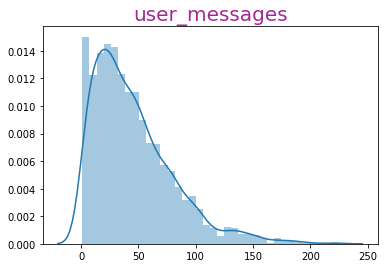

In [888]:
sns.distplot(user_messages);
plt.title('user_messages', fontdict=font);

**Вывод**

В среднем пользователь оператора сотовой связи отправляет 38 сообщений

**Посчитаем объем израсходованного интернет-трафика по месяцам**

In [889]:
internet["month"] = internet["session_date"].dt.month

In [890]:
internet.head()

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,"1,052.81",2018-09-07,1000,9
2,1000_2,"1,197.26",2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9


In [891]:
user_internet = internet.groupby(['user_id', 'month'])\
                  .agg({'mb_used':'sum'})\
                  .rename(columns={'mb_used':'mb_total_in_month'})\
                  .sort_values("mb_total_in_month" , ascending = False)\

In [892]:
user_internet.head()

,,mb_total_in_month
user_id,month,
1124,10,"49,745.69"
1240,8,"48,351.59"
1255,7,"45,180.71"
1300,11,"44,296.86"
1060,12,"43,931.36"


In [893]:
# Посмотрим медиану 
user_internet.sort_values("month").median()

mb_total_in_month   16,963.11
dtype: float64

In [894]:
# Посмотрим максилальное значение
user_internet.sort_values("month").max()

mb_total_in_month   49,745.69
dtype: float64

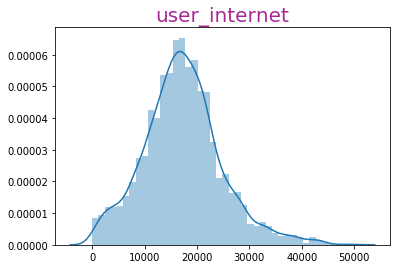

In [895]:
sns.distplot(user_internet);
plt.title('user_internet', fontdict=font);

**Вывод**

В среднем пользователь оператора сотовой связи расходует 16,9 ГБ интернет-трафика

**Посчитаем помесячную выручку с каждого пользователя 
(вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; 
остаток умножем на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану).**

In [896]:
# Склеим в одно целое 
df = user_calls.merge(user_messages, on=['user_id','month'], how='outer')

In [897]:
df.head()

month_calls_duration  calls_total_in_month  sms_total_in_month
user_id month                                                                
1499    12                   492.00                 69.00               66.00
        11                   612.00                 74.00               59.00
        10                   449.00                 68.00               48.00
        9                     70.00                  9.00               11.00
1498    9                    471.00                 59.00               44.00

In [898]:
df = df.merge(user_internet, on=['user_id','month'], how = 'outer')
df.tail()

month_calls_duration  calls_total_in_month  sms_total_in_month  \
user_id month                                                                   
1106    4                       nan                   nan                9.00   
1328    11                      nan                   nan                8.00   
        12                      nan                   nan                7.00   
        10                      nan                   nan                6.00   
1476    4                       nan                   nan                 nan   

               mb_total_in_month  
user_id month                     
1106    4               2,923.49  
1328    11             35,525.58  
        12             39,419.73  
        10             22,427.98  
1476    4                 530.78

In [899]:
# Не хватает тарифа в наборе, приклеим
df.head()

month_calls_duration  calls_total_in_month  sms_total_in_month  \
user_id month                                                                   
1499    12                   492.00                 69.00               66.00   
        11                   612.00                 74.00               59.00   
        10                   449.00                 68.00               48.00   
        9                     70.00                  9.00               11.00   
1498    9                    471.00                 59.00               44.00   

               mb_total_in_month  
user_id month                     
1499    12             13,055.58  
        11             17,963.31  
        10             17,788.51  
        9               1,845.75  
1498    9              22,134.41

In [900]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,tariff_id
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,0
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,0
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,1
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,1


In [901]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [902]:
df = df.merge(users, on='user_id', how='left')
df.head()

,user_id,month_calls_duration,calls_total_in_month,sms_total_in_month,mb_total_in_month,age,churn_date,city,first_name,last_name,reg_date,tariff,tariff_id
0,1499,492.00,69.00,66.00,"13,055.58",35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,0
1,1499,612.00,74.00,59.00,"17,963.31",35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,0
2,1499,449.00,68.00,48.00,"17,788.51",35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,0
3,1499,70.00,9.00,11.00,"1,845.75",35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,0
4,1498,471.00,59.00,44.00,"22,134.41",68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,0


In [903]:
df = df.merge(tariffs, on='tariff', how='left')
df.head()

,user_id,month_calls_duration,calls_total_in_month,sms_total_in_month,mb_total_in_month,age,churn_date,city,first_name,last_name,reg_date,tariff,tariff_id,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1499,492.00,69.00,66.00,"13,055.58",35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,0,50,15360,500,550,200,3,3
1,1499,612.00,74.00,59.00,"17,963.31",35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,0,50,15360,500,550,200,3,3
2,1499,449.00,68.00,48.00,"17,788.51",35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,0,50,15360,500,550,200,3,3
3,1499,70.00,9.00,11.00,"1,845.75",35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,0,50,15360,500,550,200,3,3
4,1498,471.00,59.00,44.00,"22,134.41",68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,0,50,15360,500,550,200,3,3


In [904]:
# Посмотрим чего нам для счастья не хватает
df.isna().sum()

user_id                     0
month_calls_duration       40
calls_total_in_month       40
sms_total_in_month        497
mb_total_in_month          11
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
tariff_id                   0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

In [905]:
df.user_id.nunique()

498

In [906]:
columns = ['sms_total_in_month', 'mb_total_in_month', 'month_calls_duration', 'calls_total_in_month']
for i in columns:
    df[i] = df[i].fillna(0)

In [907]:
# Поставим нули людям-героям: тем, которые не тратят интернет и не пишут смс
#df['sms_total_in_month'] = df['sms_total_in_month'].fillna(0)
#df['mb_total_in_month'] = df['mb_total_in_month'].fillna(0)
#df['month_calls_duration'] = df['month_calls_duration'].fillna(0)
#df['calls_total_in_month'] = df['calls_total_in_month'].fillna(0)

In [908]:
df.isna().sum()

user_id                     0
month_calls_duration        0
calls_total_in_month        0
sms_total_in_month          0
mb_total_in_month           0
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
tariff_id                   0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

In [909]:
df.duplicated().sum()

0

In [910]:
# В одном гигабайте 1024 мегабайт, а не 1000, исправляем 
# mbs нужно округлить вверх, т.к. цена указана за гигабайт
def above_the_tariff(row):
    sms = (row['sms_total_in_month'] - row['messages_included']) * row['rub_per_message']
    mins = (row['month_calls_duration'] - row['minutes_included']) * row['rub_per_minute']
    mbs = np.floor((row['mb_total_in_month'] - row['mb_per_month_included']) * row['rub_per_gb'] / 1024)
    total = 0
    for i in [sms, mins, mbs]:
        if i > 0:
            total += i
    return total

In [911]:
df.head()

,user_id,month_calls_duration,calls_total_in_month,sms_total_in_month,mb_total_in_month,age,churn_date,city,first_name,last_name,reg_date,tariff,tariff_id,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1499,492.00,69.00,66.00,"13,055.58",35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,0,50,15360,500,550,200,3,3
1,1499,612.00,74.00,59.00,"17,963.31",35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,0,50,15360,500,550,200,3,3
2,1499,449.00,68.00,48.00,"17,788.51",35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,0,50,15360,500,550,200,3,3
3,1499,70.00,9.00,11.00,"1,845.75",35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,0,50,15360,500,550,200,3,3
4,1498,471.00,59.00,44.00,"22,134.41",68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,0,50,15360,500,550,200,3,3


In [912]:
df['above_the_tariff'] = df.apply(lambda row: above_the_tariff(row), axis=1)

In [913]:
df['total_paid'] = df['rub_monthly_fee'] + df['above_the_tariff']

In [914]:
df.sort_values(by='total_paid').tail()

,user_id,month_calls_duration,calls_total_in_month,sms_total_in_month,mb_total_in_month,age,churn_date,city,first_name,last_name,reg_date,tariff,tariff_id,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,above_the_tariff,total_paid
1380,1286,739.00,95.00,68.00,"35,108.07",19,NaT,Москва,Рашид,Троицкий,2018-11-27,smart,0,50,15360,500,550,200,3,3,"4,628.00","5,178.00"
68,1486,764.00,108.00,96.00,"36,266.11",35,NaT,Нижний Новгород,Матвей,Моргунов,2018-10-31,smart,0,50,15360,500,550,200,3,3,"5,013.00","5,563.00"
2913,1042,728.00,121.00,75.00,"37,165.69",42,NaT,Хабаровск,Константин,Добрынин,2018-11-25,smart,0,50,15360,500,550,200,3,3,"5,017.00","5,567.00"
1551,1261,"1,074.00",141.00,22.00,"32,650.91",46,NaT,Казань,Мадина,Пантелеева,2018-10-30,smart,0,50,15360,500,550,200,3,3,"5,099.00","5,649.00"
67,1486,"1,007.00",133.00,83.00,"38,552.45",35,NaT,Нижний Новгород,Матвей,Моргунов,2018-10-31,smart,0,50,15360,500,550,200,3,3,"6,149.00","6,699.00"


In [915]:
df.head()

,user_id,month_calls_duration,calls_total_in_month,sms_total_in_month,mb_total_in_month,age,churn_date,city,first_name,last_name,reg_date,tariff,tariff_id,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,above_the_tariff,total_paid
0,1499,492.00,69.00,66.00,"13,055.58",35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,0,50,15360,500,550,200,3,3,48.00,598.00
1,1499,612.00,74.00,59.00,"17,963.31",35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,0,50,15360,500,550,200,3,3,871.00,"1,421.00"
2,1499,449.00,68.00,48.00,"17,788.51",35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,0,50,15360,500,550,200,3,3,474.00,"1,024.00"
3,1499,70.00,9.00,11.00,"1,845.75",35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,0,50,15360,500,550,200,3,3,0.00,550.00
4,1498,471.00,59.00,44.00,"22,134.41",68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,0,50,15360,500,550,200,3,3,"1,323.00","1,873.00"


In [916]:
df.sort_values("total_paid" , ascending = False)\

,user_id,month_calls_duration,calls_total_in_month,sms_total_in_month,mb_total_in_month,age,churn_date,city,first_name,last_name,reg_date,tariff,tariff_id,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,above_the_tariff,total_paid
67,1486,"1,007.00",133.00,83.00,"38,552.45",35,NaT,Нижний Новгород,Матвей,Моргунов,2018-10-31,smart,0,50,15360,500,550,200,3,3,"6,149.00","6,699.00"
1551,1261,"1,074.00",141.00,22.00,"32,650.91",46,NaT,Казань,Мадина,Пантелеева,2018-10-30,smart,0,50,15360,500,550,200,3,3,"5,099.00","5,649.00"
2913,1042,728.00,121.00,75.00,"37,165.69",42,NaT,Хабаровск,Константин,Добрынин,2018-11-25,smart,0,50,15360,500,550,200,3,3,"5,017.00","5,567.00"
68,1486,764.00,108.00,96.00,"36,266.11",35,NaT,Нижний Новгород,Матвей,Моргунов,2018-10-31,smart,0,50,15360,500,550,200,3,3,"5,013.00","5,563.00"
1380,1286,739.00,95.00,68.00,"35,108.07",19,NaT,Москва,Рашид,Троицкий,2018-11-27,smart,0,50,15360,500,550,200,3,3,"4,628.00","5,178.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1714,1233,193.00,32.00,13.00,"8,557.62",28,NaT,Воронеж,Сара,Алфимова,2018-05-23,smart,0,50,15360,500,550,200,3,3,0.00,550.00
1695,1238,68.00,11.00,25.00,"13,013.25",57,NaT,Ростов-на-Дону,Радислав,Наумов,2018-01-08,smart,0,50,15360,500,550,200,3,3,0.00,550.00
2800,1059,330.00,43.00,6.00,"8,395.72",47,NaT,Курск,Глеб,Свиридов,2018-04-14,smart,0,50,15360,500,550,200,3,3,0.00,550.00
1694,1238,127.00,14.00,23.00,"13,469.31",57,NaT,Ростов-на-Дону,Радислав,Наумов,2018-01-08,smart,0,50,15360,500,550,200,3,3,0.00,550.00


In [917]:
# Посмотрим медиану 
df["total_paid"].sort_values().median()

1557.5

In [918]:
# Посмотрим максилальное значение
df["total_paid"].sort_values().max()

6699.0

In [919]:
df.loc[67]

user_id                                 1486
month_calls_duration                1,007.00
calls_total_in_month                  133.00
sms_total_in_month                     83.00
mb_total_in_month                  38,552.45
age                                       35
churn_date                               NaT
city                         Нижний Новгород
first_name                            Матвей
last_name                           Моргунов
reg_date                 2018-10-31 00:00:00
tariff                                 smart
tariff_id                                  0
messages_included                         50
mb_per_month_included                  15360
minutes_included                         500
rub_monthly_fee                          550
rub_per_gb                               200
rub_per_message                            3
rub_per_minute                             3
above_the_tariff                    6,149.00
total_paid                          6,699.00
Name: 67, 

**Вывод**

В среднем оператор сотовой получает каждого пользователя 1557 рублей, максимум 6699 рублей. Такие цифры получились, из-за того что определенная группа пользователей, перерасходовола все лимиты покетов тирифа. 


Например: Матвей Моргунов из Нижний Новгород, был подключен к тарифу «Смарт», и если бы он не ичсерпал лимиты, то абоненская плата сосавила всего 550 рублей.


<a name="stage_3"></a>
# Шаг 3. Проанализируем данные

In [920]:
# Количество уникальных значений
df['tariff'].value_counts()

smart    2229
ultra     985
Name: tariff, dtype: int64

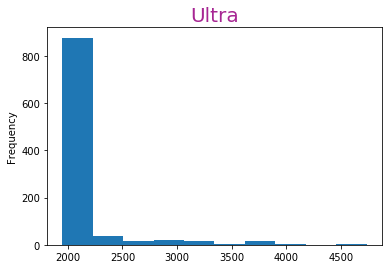

In [921]:
df[df["tariff"] == "ultra"]["total_paid"].plot(kind = 'hist', bins = 10);
plt.title('Ultra', fontdict=font);

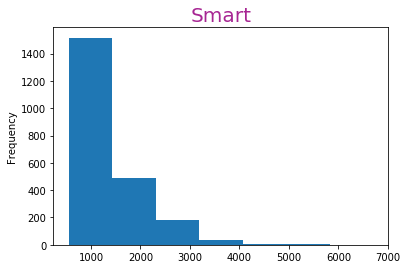

In [922]:
df[df["tariff"]== "smart"]["total_paid"].plot(kind = "hist", bins = 7);
plt.title('Smart', fontdict=font);

In [923]:
df.groupby("tariff")\
    .agg({"total_paid" : ["median" , "mean" , "var" , "std"]})\
    .style.format("{:.2f}")

Пользователи оператора связи, которые используют тариф "Смарт" переплачивают почти в два раза, из-за того, что выходят за рамки  тарифного пакета, когда пользователи тарифа "Ультра" укладываються в рамках пакета

**Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?**

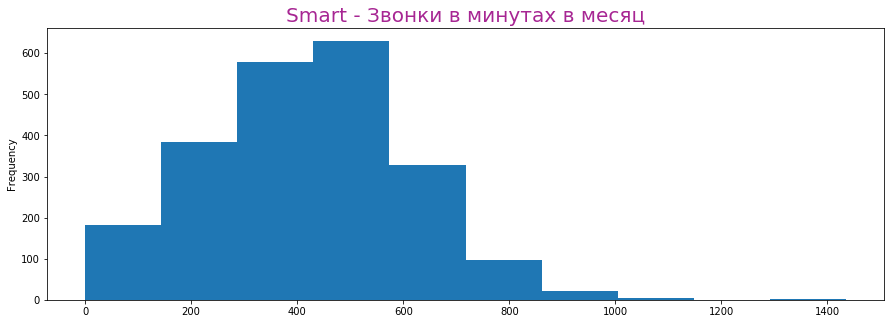

In [924]:
plt.subplots(figsize = (15,5))
df[df["tariff"]== "smart"]["month_calls_duration"].plot(kind = "hist", bins = 10);
plt.title("Smart - Звонки в минутах в месяц", fontdict=font);

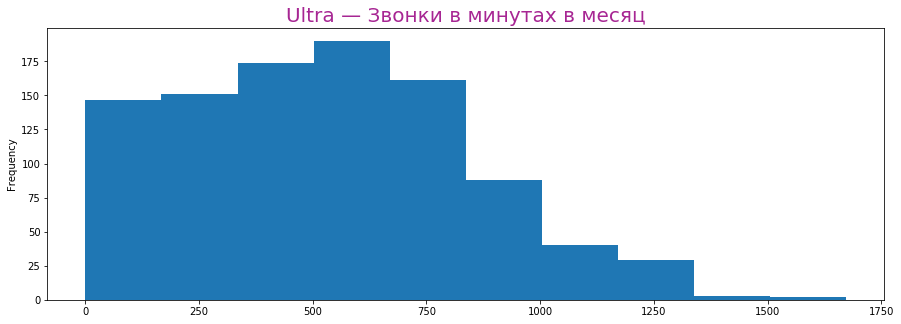

In [925]:
plt.subplots(figsize = (15,5))
df[df['tariff'] == 'ultra']['month_calls_duration'].plot(kind='hist', bins=10)
plt.title('Ultra — Звонки в минутах в месяц', fontdict=font);

In [926]:
df.groupby("tariff")\
    .agg({"month_calls_duration" : ["median" , "mean" , "var" , "std"]})\
    .style.format("{:.2f}")

Пользователи оператора связи, которые используют тариф "Смарт" расходуют 450 минут связи, тем самым не выходя за рамки тарифного пакета, а пользователи тарифа "Ультра" расходуют 550 минут связи, плюс остается около 2450 минут в пределах тарифного пакета

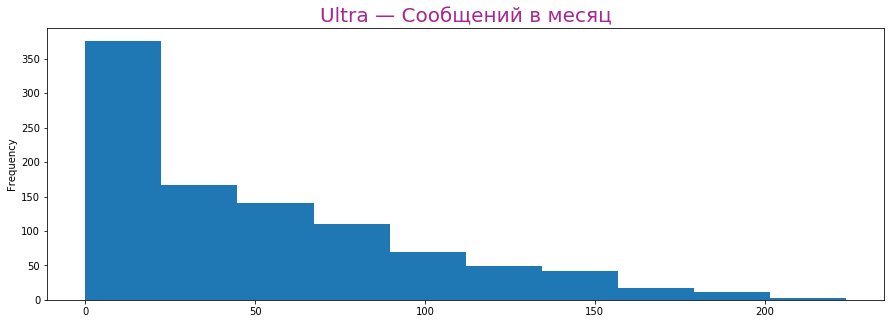

In [927]:
plt.subplots(figsize = (15,5))
df[df['tariff'] == 'ultra']['sms_total_in_month'].plot(kind = "hist", bins = 10);
plt.title('Ultra — Сообщений в месяц', fontdict=font);

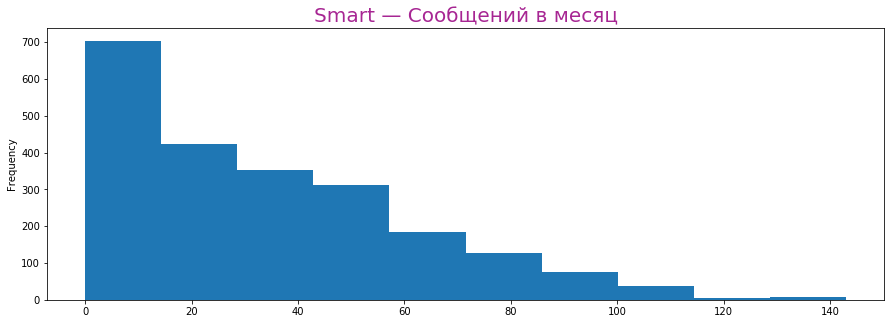

In [928]:
plt.subplots(figsize = (15,5))
df[df['tariff'] == 'smart']['sms_total_in_month'].plot(kind = "hist", bins = 10);
plt.title('Smart — Сообщений в месяц', fontdict=font);

In [929]:
df.groupby("tariff")\
    .agg({"sms_total_in_month" : ["median" , "mean" , "var" , "std"]})\
    .style.format("{:.2f}")

Пользователи оператора связи, которые используют тариф "Смарт" расходуют 30 сообщений, тем самым не выходя за рамки тарифного пакета, а пользователи тарифа "Ультра" расходуют 40 сообщений, плюс остается около 960 сообщений в пределах тарифного пакета. Если у вас есть подключение к интернету, то отправлять сообщения с помощью мессенджера более актуально.

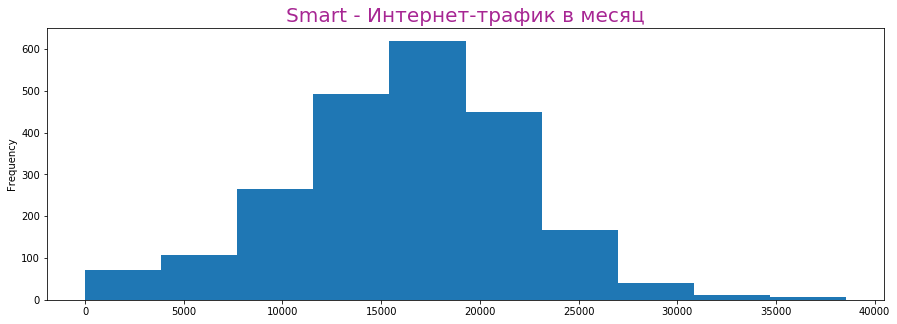

In [930]:
plt.subplots(figsize = (15,5))
df[df["tariff"]== "smart"]["mb_total_in_month"].plot(kind = "hist", bins = 10);
plt.title("Smart - Интернет-трафик в месяц", fontdict=font);

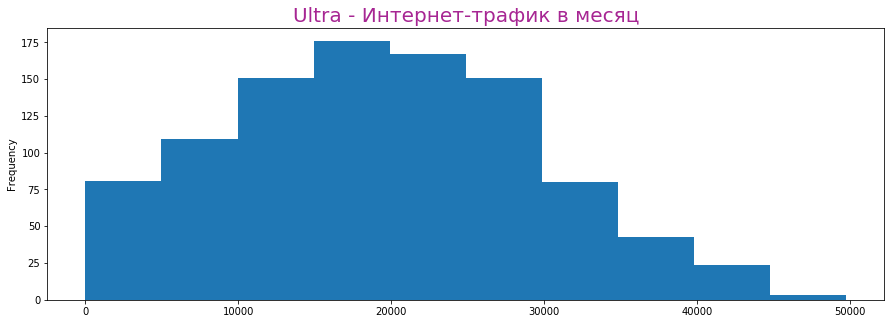

In [931]:
plt.subplots(figsize = (15,5))
df[df["tariff"]== "ultra"]["mb_total_in_month"].plot(kind = "hist", bins = 10);
plt.title("Ultra - Интернет-трафик в месяц", fontdict=font);

In [932]:
df.groupby("tariff")\
    .agg({"mb_total_in_month" : ["median" , "mean" , "var" , "std"]})\
    .style.format("{:.2f}")

Среднее и медиана лежат рядом и там и там и тут тоже. На Смарте люди выходят за пределы тарифа больше, у Ультры снова запас — в 10 Гб, но и разброс больше

In [1]:
# Построим графики распределенияtotal_paid
pd.plotting.scatter_matrix(smart[["total_paid"]], alpha = 0.3, figsize = (10,10)) 

NameError: name 'pd' is not defined

<a name="stage_4"></a>
# Шаг 4. Проверим гипотезы

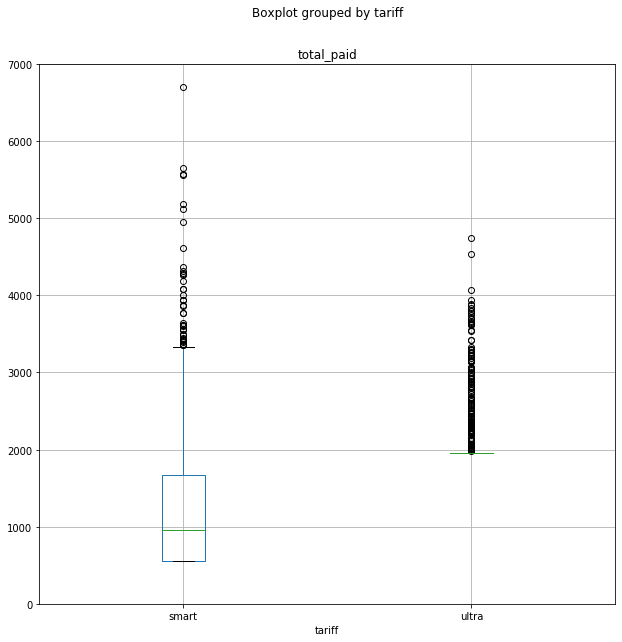

In [934]:
df.boxplot('total_paid', by='tariff', figsize=(10,10)).set_ylim(0,7000);
warnings.simplefilter('ignore');

In [790]:
# Перед проверкой гипотез нужно избавиться от выбросов. Методом 3х сигм. Выбросы влияют на распределение t-критерия

def delete_outliers(df, column, graphic=0, x = 10, y = 10):
    q1 = df[column].quantile(0.25)                 
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    iqr_test = (df[column] >= (q1 - 1.5 * iqr)) & (df[column] <= (q3 + 1.5 * iqr))
    if graphic == 1:
        return df.loc[iqr_test].boxplot([column], figsize=(x,y))
    else:
        return df.loc[iqr_test]

Будем использовать t-критерий Стьюдента, так как сравниваемые выборки независимы между собой.

Гипотеза о равенстве средних двух генеральных совокупностей №1

In [791]:
df.head()

,user_id,month_calls_duration,calls_total_in_month,sms_total_in_month,mb_total_in_month,age,churn_date,city,first_name,last_name,reg_date,tariff,tariff_id,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,above_the_tariff,total_paid
0,1499,492.00,69.00,66.00,"13,055.58",35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,0,50,15360,500,550,200,3,3,48.00,598.00
1,1499,612.00,74.00,59.00,"17,963.31",35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,0,50,15360,500,550,200,3,3,871.00,"1,421.00"
2,1499,449.00,68.00,48.00,"17,788.51",35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,0,50,15360,500,550,200,3,3,474.00,"1,024.00"
3,1499,70.00,9.00,11.00,"1,845.75",35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,0,50,15360,500,550,200,3,3,0.00,550.00
4,1498,471.00,59.00,44.00,"22,134.41",68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,0,50,15360,500,550,200,3,3,"1,323.00","1,873.00"


**Cформулируем гипотизы**

При проверке значимости гипотезу следует формулировать независимо от используемых при ее проверке данных (до проведения проверки). В таком случае можно получить действительно продуктивный результат.
Всегда проверяют нулевую гипотезу (H0), которая отвергает эффект (например, разница средних равняется нулю) в популяции.

№1

    -H0 средняя выручка пользователей тарифов «Ультра» и «Смарт» не различается;
    -H1 средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;

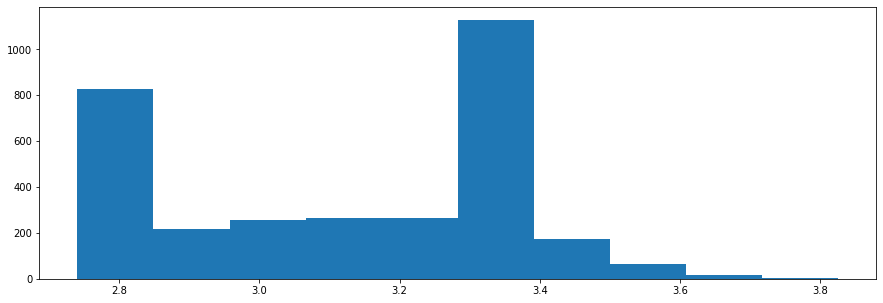

In [812]:
plt.subplots(figsize = (15,5))
plt.hist(np.log10(df["total_paid"]), bins = 10);

In [ ]:
df[df["tariff"]== "smart"]["total_paid"].plot(kind = "hist", bins = 10);
plt.title("Smart - Выручка в месяц", fontdict=font);

In [815]:
ultra = df[df["tariff"] == "ultra"]
smart = df[df["tariff"] == "smart"]

In [816]:
ultra = delete_outliers(ultra, 'total_paid', 0)
ultra = ultra['total_paid']

In [817]:
smart = delete_outliers(smart, "total_paid", 0)
smart = smart['total_paid']

In [818]:
alpha = 0.05

In [819]:
results  = st.ttest_ind(ultra, smart)

In [820]:
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.955636807646232e-203
Отвергаем нулевую гипотезу


Есть значимаемые значения между выборками

№2

    -H0 средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;
    -H1 средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов;

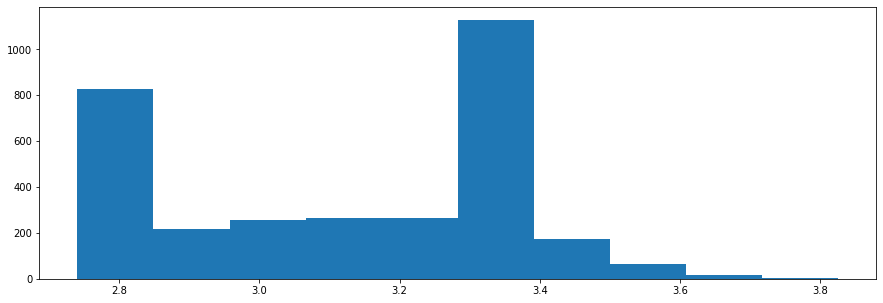

In [821]:
plt.subplots(figsize = (15,5))
plt.hist(np.log10(df["total_paid"]), bins = 10);

In [822]:
df['city'].unique()

array(['Пермь', 'Владикавказ', 'Челябинск', 'Вологда', 'Иркутск', 'Омск',
       'Красноярск', 'Санкт-Петербург', 'Москва', 'Новороссийск',
       'Кострома', 'Нижний Новгород', 'Киров', 'Екатеринбург',
       'Ульяновск', 'Новокузнецк', 'Хабаровск', 'Грозный',
       'Набережные Челны', 'Ярославль', 'Сочи', 'Тамбов', 'Новосибирск',
       'Саранск', 'Тольятти', 'Ижевск', 'Магнитогорск', 'Барнаул',
       'Саратов', 'Балашиха', 'Томск', 'Липецк', 'Казань', 'Самара',
       'Орёл', 'Подольск', 'Улан-Удэ', 'Уфа', 'Тверь', 'Оренбург',
       'Астрахань', 'Калининград', 'Владимир', 'Волгоград',
       'Нижний Тагил', 'Брянск', 'Пенза', 'Махачкала', 'Воронеж',
       'Краснодар', 'Стерлитамак', 'Ростов-на-Дону', 'Ставрополь',
       'Рязань', 'Севастополь', 'Владивосток', 'Череповец', 'Курган',
       'Чита', 'Смоленск', 'Нижневартовск', 'Калуга', 'Курск', 'Белгород',
       'Чебоксары', 'Сургут', 'Кемерово', 'Волжский', 'Мурманск',
       'Якутск', 'Тюмень', 'Архангельск', 'Петрозаводск', 

In [823]:
df['region'] = np.where(df['city'] == 'Москва', 'Москва', 'Провинция')

In [824]:
moscow = df[df['region'] == 'Москва']
province = df[df['region'] == 'Провинция']

In [825]:
moscow = delete_outliers(moscow, 'total_paid', 0)
moscow = moscow['total_paid']

In [826]:
province = delete_outliers(province, 'total_paid', 0)
province = province['total_paid']

In [827]:
results = st.ttest_ind(moscow, province)

In [828]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.27684484922856367
Не получилось отвергнуть нулевую гипотезу


С вероятностью в 28% такой результат может быть получен случайно. Значимых различий нет.

<a name="stage_5"></a>
# Шаг 5. Общий вывод

Мы открыли датасеты изучили общую информацию. А именно...

    -таблица calls (информация о звонках )  
    Размер выборки - 202607 записей

    -таблица internet (информация об интернет сессиях и траффике) 
    Размер выборки - 149396 записей

    - таблица messages  (информация о сообщениях) 
    Размер выборки - 123036 записей

    - таблица users  (информация о пользователях) 
    Размер выборки - 500 записей

    - таблица tariffs  (информация о тарифах компании "Мегалайн") 
    Размер выборки - 2 записи
    
Проанализировали  данные:
     
     Тариф «Смарт»

    Потраченные минуты в месяц
    - Среднее значение - 417
    - Медиана - 422
    - Переменная (показатель, который склонен меняться со временем) - 36219
    - Статистический показатель - 190

     Тариф «Ультра»

    Потраченные минуты в месяц
    - Среднее значение - 526
    - Медиана - 518
    - Переменная (показатель, который склонен меняться со временем) - 100873
    - Статистический показатель - 317

**Пользователи оператора связи, которые используют тариф "Смарт" расходуют 422 минут связи, тем самым не выходя за рамки тарифного пакета, а пользователи тарифа "Ультра" расходуют 2482 минут связи, плюс остается около 2450 минут в пределах тарифного пакета.**

    Тариф «Смарт»

    Потраченные сообщения в месяц
    - Среднее значение - 33
    - Медиана - 28
    - Переменная (показатель, который склонен меняться со временем) - 796
    - Статистический показатель - 28

    Тариф «Ультра»

    Потраченные сообщения в месяц
    - Среднее значение - 49
    - Медиана - 38
    - Переменная (показатель, который склонен меняться со временем) - 2285
    - Статистический показатель - 47

**Пользователи оператора связи, которые используют тариф "Смарт" расходуют 30 сообщений, тем самым не выходя за рамки тарифного пакета, а пользователи тарифа "Ультра" расходуют 40 сообщений, плюс остается около 960 сообщений в пределах тарифного пакета. Если у вас есть подключение к интернету, то отправлять сообщения с помощью мессенджера более актуально.**

    Тариф «Смарт»

    Потраченные сообщения в месяц
    - Среднее значение - 33
    - Медиана - 28
    - Переменная (показатель, который склонен меняться со временем) - 796
    - Статистический показатель - 28

    Тарифу «Ультра»

    Потраченные сообщения в месяц
    - Среднее значение - 49
    - Медиана - 38
    - Переменная (показатель, который склонен меняться со временем) - 2285
    - Статистический показатель - 47

**Пользователи оператора связи, которые используют тариф "Смарт" расходуют 28 сообщений, тем самым не выходя за рамки тарифного пакета, а пользователи тарифа "Ультра" расходуют 38 сообщений, плюс остается около 962 сообщений в пределах тарифного пакета. Если у вас есть подключение к интернету, то отправлять сообщения с помощью мессенджера более актуально.**

    Тариф «Смарт»

    Расходование интернет-трафика в месяц
    - Среднее значение - 16208
    - Медиана - 16506
    - Переменная (показатель, который склонен меняться со временем) - 34462496
    - Статистический показатель - 5870

    Тарифу «Ультра»

    Расходование интернет-трафика в месяц
    - Среднее значение - 19468
    - Медиана - 19308
    - Переменная (показатель, который склонен меняться со временем) - 101751013
    - Статистический показатель - 10087

**Среднее и медиана лежат рядом и там и там и тут тоже. На Смарте люди выходят за пределы тарифа больше, у Ультры снова запас — в 10 Гб, но и разброс больше**

    Гипотиза №1
    - Полученное нами значение p - 2.95, что, вероятность случайного совпадения срендих наших выборок мало. Нулевая гипотиза опровергается, альтернативная гипотиза наших выборок отличается, не отвергается.
    
    
    Гипотиза №2
    - Полученное нами значение p - 0.27, говорит, что есть большая вероятность того, что отличие среди средних значений наших выборок случайно и мфы не можем опровергнуть нулевую гипотизу, которая говорит о равенстве среднего значения, альтернативная гипотиза,  отвергается.
    


<a name="stage_6"></a>
#  Рекомендации

**Для оператора**

- Исправить округление — нулевые минуты должны округляться до 1
- Не публиковать незашифрованные ФИО и города в одном наборе
- Подумать над оптимизацией тарифов

**Для бизнеса**

- Есть пользователи, которые выходят за рамки пакета тарифного плана "Смарт", соответственно переплачивают за звонки круглую сумму. Например , пользователь Матвей Моргунов из Нижнего  Новгород, был подключен к тарифу «Смарт», и доходил до того, что оплачивал 6,699 рублей в месяц, когда абонентская плата составляет всего 550 рублей. Имеет место быть создать тарифный план, в котором пользователь сам сможет выбрать, сколько ему нужно минут в месяц на связь. Стоимость тарифа возрастет, исходя из увеличения кол-во минут в пакете, так же пользователь не уйдет к конкурентам.
- Создать создать тариф "Бизнес" для юридических лиц, с фиксированными тарифами и тариф "Молодежный", для молодежи с разными плюшками мол WhatsApp, Viber, Skype, Telegram и Twitter. Можно еще добавить ко всему тариф "Лояльный" для взрослого поколения, людей пенсионного возраста, кому не нужен интернет, смс и мессенджеры, акцент сделать на подключении номеров (родственников, до пяти) с безлимитными звонками на эти номера. Все это поспособствует увеличению пользователей.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Выводы понятны и логичны, а самое главное подкреплены выявленными фактами.
       
В целом сам проект выполнен на хорошем уровне! На протяжении всей работы чувствуется глубина проработки задачи и это безусловный плюс для нас. Было использовано большое количество методов, которые будут помогать тебе в дальнейших проектах.
       
Рекомендую посмотреть в открытом доступе на ютубе например – курс по Алгоритмам и структурам данных, эта информация поможет нам в дальнейшем при работе с данными.
    
Поздравляю с успешным завершением проекта 😊👍
    
И желаю успехов в новых работах 😊

    
</div>